
# Data Science Assignment - Card Transaction Data
##### Esra Arı


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#datacleaning">Data Cleaning</a></li>
<li><a href="#exporatory">Exploratory Data Analysis</a></li>
<li><a href="#segment">Customer Segmentation</a></li>
<li><a href="#predict">Predictive Modeling</a></li>

</ul>

<a id='intro'></a>
## Introduction

This assignment is based on a dataset of credit card transactions that you can download from
Link to download the dataset

Each row in the dataset refers to one credit card purchase by a cardholder. Each cardholder
belongs to an agency. Each transaction has information about the amount, date, merchant and
merchant category, as well as a description of the expense.

<a id='wrangling'></a>
## Data Wrangling

> * Load in the data, 
> * Check for cleanliness

Before exploring the dataset, necessary modules are imported for the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from pandas import pivot_table
from datetime import date, timedelta, datetime
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

% matplotlib inline
from difflib import get_close_matches

C:\Users\U083682\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In this section we are going to upload and look up the table and basic statistic to gain some inside for the questions.

In [2]:
df = pd.read_csv("res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv")
df.sample(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
410357,201405,60500,REGENTS FOR HIGHER EDUCATION,Ferguson,K,GENERAL PURCHASE,89.99,GODADDY.COM,05/02/2014 12:00:00 AM,05/05/2014 12:00:00 AM,COMPUTER NETWORK/INFORMATION SERVICES
285742,201403,2500,OKLAHOMA MILITARY DEPARTMENT,GULLEY,P,PRODUCTS AND SERVICES EA,16.80,VOSS LIGHTING - TULSA,02/27/2014 12:00:00 AM,03/03/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT
338232,201403,76000,UNIVERSITY OF OKLAHOMA,FLETCHER,A,1.5 GAL FOLIAGE BASIC EA|15 OZ PURPLE FOLIAGE ...,1.94,LOWES #01165,02/28/2014 12:00:00 AM,03/03/2014 12:00:00 AM,HOME SUPPLY WAREHOUSE STORES
100656,201307,32000,DEPARTMENT OF WILDLIFE CONSERVATION,Davenport,J,GENERAL PURCHASE,53.75,JAMES SUPPLIES AND RENTAL,07/24/2013 12:00:00 AM,07/26/2013 12:00:00 AM,WELDING SERVICES
284281,201404,1000,OKLAHOMA STATE UNIVERSITY,Buchanan,J,25 nmole DNA Oligo 1|25 nmole DNA Oligo 1,22.00,INTEGRATED DNA TECH,04/18/2014 12:00:00 AM,04/21/2014 12:00:00 AM,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED
241169,201307,80500,DEPARTMENT OF REHABILITATION SERVICES,KING,R,GENERAL PURCHASE,72.73,SUDDENLINK-NAT'L SITE,07/17/2013 12:00:00 AM,07/18/2013 12:00:00 AM,"CABLE, SATELLITE, AND OTHER PAY TELEVISION AND..."
437832,201405,80000,OKLA. CAREER AND TECHNOLOGY EDUCATION,GOODNER,M,AIR TRAVEL,594.00,AMERICAN AI 0012389994239,05/21/2014 12:00:00 AM,05/23/2014 12:00:00 AM,AMERICAN AIRLINES
17939,201308,1000,OKLAHOMA STATE UNIVERSITY,Kindred,A,GENERAL PURCHASE,546.00,CYGNUS BUSINESS MEDIA,08/20/2013 12:00:00 AM,08/21/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
107124,201307,34500,DEPARTMENT OF TRANSPORTATION,Lewis,G,GENERAL PURCHASE,4930.82,ROCK HAULERS LLC,07/02/2013 12:00:00 AM,07/04/2013 12:00:00 AM,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED
286406,201402,4000,"DEPARTMENT OF AGRICULTURE, FOOD, ANF FOR",Whaley,J,GENERAL PURCHASE,30.31,LOCKE SUPPLY WE MCALESTER,02/11/2014 12:00:00 AM,02/13/2014 12:00:00 AM,HARDWARE STORES


At first glance, it seems that it is not a clean dataset. 

•All columns should be checked one by one; however even without do it there is no standartization for describtion and vendor columns.


•Also, columns' name should be standartized.

In [3]:
df.shape

(442458, 11)

Dataset includes approximately 442K rows and 11 columns/features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
Year-Month                      442458 non-null int64
Agency Number                   442458 non-null int64
Agency Name                     442458 non-null object
Cardholder Last Name            442458 non-null object
Cardholder First Initial        442458 non-null object
Description                     442458 non-null object
Amount                          442458 non-null float64
Vendor                          442458 non-null object
Transaction Date                442458 non-null object
Posted Date                     442458 non-null object
Merchant Category Code (MCC)    442458 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


In [5]:
df.isnull().sum()

Year-Month                      0
Agency Number                   0
Agency Name                     0
Cardholder Last Name            0
Cardholder First Initial        0
Description                     0
Amount                          0
Vendor                          0
Transaction Date                0
Posted Date                     0
Merchant Category Code (MCC)    0
dtype: int64

There is no any missing values. 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year-Month,442458.0,201357.284375,47.107417,201307.00,201309.00,201401.00,201404.0,201406.00
Agency Number,442458.0,42785.860353,33378.461293,1000.00,1000.00,47700.00,76000.0,98000.00
Amount,442458.0,424.991170,5266.509108,-42863.04,30.91,104.89,345.0,1903858.37


Amount feature has negative values. It should be checked whether there is any quality issue or not.

In [7]:
df[df['Amount'] < 0].head(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
25,201307,1000,OKLAHOMA STATE UNIVERSITY,Foye,S,GENERAL PURCHASE,-30.00,"AFFYMETRIX, INC",07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...
114,201307,1000,OKLAHOMA STATE UNIVERSITY,Henderson,K,GENERAL PURCHASE,-340.00,INTERWRX (INTERWRX.COM),07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,TELECOMMUNICATION EQUIPMENT AND TELEPHONE SALES
148,201307,1000,OKLAHOMA STATE UNIVERSITY,Flock,S,WTRFALL PUMP EA|WTRFALL PUMP EA,-258.00,THE HOME DEPOT 3904,07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,HOME SUPPLY WAREHOUSE STORES
178,201307,1000,OKLAHOMA STATE UNIVERSITY,Arthur,H,GENERAL PURCHASE,-167.20,GRAND VISTA HOTEL SIMI VA,07/29/2013 12:00:00 AM,07/30/2013 12:00:00 AM,"LODGING--HOTELS,MOTELS,AND RESORTS"
185,201307,1000,OKLAHOMA STATE UNIVERSITY,Page,M,GENERAL PURCHASE,-39.26,Amazon.com,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,BOOK STORES
189,201307,1000,OKLAHOMA STATE UNIVERSITY,Parsons,D,GENERAL PURCHASE,-60.27,TC'S TRUCK PARTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,AUTOMOTIVE PARTS AND ACCESSORIES STORES
286,201307,1000,OKLAHOMA STATE UNIVERSITY,Bryant,K,Tax Adjustment EA,-2.42,WW GRAINGER,07/24/2013 12:00:00 AM,07/30/2013 12:00:00 AM,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED
306,201307,1000,OKLAHOMA STATE UNIVERSITY,Coppick,L,GENERAL PURCHASE,-53.85,STILLWATER MILLING COMP,07/29/2013 12:00:00 AM,07/30/2013 12:00:00 AM,MISCELLANEOUS AND SPECIALTY RETAIL STORES
313,201307,1000,OKLAHOMA STATE UNIVERSITY,Dunford,N,GENERAL PURCHASE,-64.00,WESTIN KANSAS CITY,07/25/2013 12:00:00 AM,07/30/2013 12:00:00 AM,WESTIN HOTELS
356,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,-2474.99,CDW GOVERNMENT,07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,CATALOG MERCHANTS


There is no spesific vendor or MCC code for observations which have negative amount.

In [8]:
df[df['Cardholder Last Name'] == 'Ivey'].head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
356,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,-2474.99,CDW GOVERNMENT,07/26/2013 12:00:00 AM,07/29/2013 12:00:00 AM,CATALOG MERCHANTS
1367,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,2474.99,CDW GOVERNMENT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CATALOG MERCHANTS
4419,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,GENERAL PURCHASE,9.99,APL APPLE ITUNES STORE,06/28/2013 12:00:00 AM,07/01/2013 12:00:00 AM,RECORD STORES
4420,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,GENERAL PURCHASE,9.99,APL APPLE ITUNES STORE,06/28/2013 12:00:00 AM,07/01/2013 12:00:00 AM,RECORD STORES
4421,201307,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,GENERAL PURCHASE,9.99,APL APPLE ITUNES STORE,06/28/2013 12:00:00 AM,07/01/2013 12:00:00 AM,RECORD STORES


When I investigate spesically for Ivey, I think that it is not quality or payback issue; because, money got into account 3 days before pay it back. Therefore, I will be left negative amounts as it is.

In [9]:
df.nunique()

Year-Month                         12
Agency Number                     116
Agency Name                       124
Cardholder Last Name             3911
Cardholder First Initial           38
Description                     88749
Amount                          90447
Vendor                          86729
Transaction Date                  392
Posted Date                       258
Merchant Category Code (MCC)      435
dtype: int64

There are too many unique observations for vendor and description columns. They need to be cleaned before doing any analysis.

We have little dirty dataset. Following tidiness and quality issues that found from at the data wrangling part, is needed to be solved.

* Labels should be renamed.                 
* Donot anything for amount column, it could mean that there are inflow transactions. In the further analysis, outlier elimantion could be done.
* There are observations which have numeric cardholder last and first initial name. These observation should be dropped; because, they are big data quality issue. Also, some observations has "Cardholder" as cardholder last name. They are also data quality issue that needs to be dropped.
* There is no standartization for vendor column, observations which could be same meaning should be grouped.
* I will not use description column; because, it has many unique value. Hard to standatized in a short time.

<a id='datacleaning'></a>
## Cleaning Data

In this section, I am going to define the problem which are listed in data wrangling part, code the solution then test the code sequentialy.

In [10]:
df_clean = df.copy()

#### Define (1)

Labels should be renamed.

#### Code

In [11]:
df_clean = df_clean.rename(columns={'Year-Month' :'year_month',
                                    'Agency Number' : 'agency_number',
                                    'Agency Name':'agency_name',
                                    'Cardholder Last Name': 'cardholder_lname',
                                    'Cardholder First Initial': 'cardholder_finit',
                                    'Transaction Date': 'transaction_date',
                                    'Posted Date': 'posted_date',
                                    'Merchant Category Code (MCC)': 'MCC',
                                    'Description': 'description',
                                    'Vendor': 'vendor',
                                    'Amount': 'amount'})

#### Test

In [12]:
df_clean.columns

Index(['year_month', 'agency_number', 'agency_name', 'cardholder_lname',
       'cardholder_finit', 'description', 'amount', 'vendor',
       'transaction_date', 'posted_date', 'MCC'],
      dtype='object')

#### Define(2)

There are observations which have numeric cardholder last and first initial name. These observation should be dropped; because, they are big data quality issue. Also, some observations has Cardholder as cardholder last name. They are also data quality issue that needs to be dropped.

#### Code

In [13]:
df_clean= df_clean[~df_clean.cardholder_lname.str.contains('(\d+)')] #drop numeric observations
df_clean= df_clean[~df_clean.cardholder_finit.str.contains('(\d+)')] #drop numeric observations
df_clean= df_clean[~df_clean.cardholder_lname.str.contains('Cardholder')] #drop obervations consists Cardholder as cardholder name

C:\Users\U083682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\Users\U083682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


#### Test

In [14]:
df_clean[df_clean['cardholder_lname' ].str.contains('5')]

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC


In [15]:
df_clean[df_clean['cardholder_lname' ].str.contains('Cardholder')]

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC


#### Define(3)

There is no standartization for vendor column, observations which could be same meaning should be grouped.
Firstly, numeric and "#" values are extracted from feature. And all observartions turned into lowercase to be standartized.

#### Code

In [16]:
df_clean['vendor'] = df_clean['vendor'].str.replace('\d+', '') ##extract numbers
df_clean['vendor'] = df_clean['vendor'].str.replace('#', '')  ##extract '#'
df_clean['vendor'] = df_clean['vendor'].str.replace('  ', ' ') #extract double spaces
df_clean['vendor'] = df_clean['vendor'].map(lambda x: x if type(x)!=str else x.lower()) #do lowercase

#### Test

In [17]:
df_clean.vendor.value_counts()

staples                      14842
amazon mktplace pmts         12197
ww grainger                  12072
american ai                  12015
wal-mart                     11848
amazon.com                   10766
lowes                        10237
fedex                         8164
agent fee                     6161
bill warren office produc     4479
officemax ct in               4056
southwes                      3982
vwr international inc         3904
united                        3298
at&t bill payment             3064
delta air                     2977
oreilly auto                  2961
staples                       2926
airgas central                2653
at&t data                     2622
the home depot                2567
fastenal company              2542
mckesson medical supply       2491
stapls                        2350
dmi dell higher educ          2029
okla resorts parks & golf     2012
office depot                  1936
wm supercenter                1880
sigma aldrich us    

#### Define(4)

There is no standartization for vendor column, observations which could be same meaning should be grouped.

Top frequent vendor observations are investigated to find out their close matches with get_close_matches function.

In [18]:
print(get_close_matches('amazon', df_clean.vendor.unique(), 5))
print(get_close_matches('staples', df_clean.vendor.unique(), 5))
print(get_close_matches('amazon mktplace', df_clean.vendor.unique(), 10))
print(get_close_matches('ww grainger', df_clean.vendor.unique(), 5))
print(get_close_matches('american ai', df_clean.vendor.unique(), 5))
print(get_close_matches('wal-mart', df_clean.vendor.unique(), 10))
print(get_close_matches('amazon', df_clean.vendor.unique(), 5))
print(get_close_matches('lowes', df_clean.vendor.unique(), 5))
print(get_close_matches('fedex', df_clean.vendor.unique(), 8))
print(get_close_matches('agent fee', df_clean.vendor.unique(), 5))
print(get_close_matches('bill warren office produc', df_clean.vendor.unique(), 5))
print(get_close_matches('officemax ct in', df_clean.vendor.unique(), 7))
print(get_close_matches('southwes', df_clean.vendor.unique(), 5))
print(get_close_matches('vwr international inc', df_clean.vendor.unique(), 5))
print(get_close_matches('united', df_clean.vendor.unique(), 5))
print(get_close_matches('at&t bill payment', df_clean.vendor.unique(), 5))
print(get_close_matches('delta air', df_clean.vendor.unique(), 5))
print(get_close_matches('oreilly auto', df_clean.vendor.unique(), 5))
print(get_close_matches('staples', df_clean.vendor.unique(), 5))
print(get_close_matches('airgas central', df_clean.vendor.unique(), 5))
print(get_close_matches('at&t data', df_clean.vendor.unique(), 5))
print(get_close_matches('the home depot', df_clean.vendor.unique(), 5))
print(get_close_matches('fastenal company', df_clean.vendor.unique(), 5))
print(get_close_matches('mckesson medical supply', df_clean.vendor.unique(), 5))
print(get_close_matches('stapls', df_clean.vendor.unique(), 5))
print(get_close_matches('dmi dell higher educ', df_clean.vendor.unique(), 5))
print(get_close_matches('okla resorts parks & golf', df_clean.vendor.unique(), 5))
print(get_close_matches('office depot', df_clean.vendor.unique(), 5))
print(get_close_matches('wm supercenter', df_clean.vendor.unique(), 5))
print(get_close_matches('sigma aldrich us', df_clean.vendor.unique(), 5))
print(get_close_matches('staples direct', df_clean.vendor.unique(), 5))
print(get_close_matches('eureka', df_clean.vendor.unique(), 5))

['amazon eu', 'amazon.com', 'amano', 'amazonlocal', 'gamago']
['staples', 'stapls', 'staples    ', "stahl's", 'rust sales']
['amazon mktplace pmts', 'amazon mktplce eu-uk', 'amazon mktplce eu-fr', 'amazon mktplce eu-de', 'amazon marketplce ca', 'claim adj/amazon mktplace', 'unm marketplace', 'unl marketplace', 'amazon prime', 'amazon payments']
['ww grainger', 'claim adj/ww grainger', 'itw strapbinder', 'rainmaker', 'dp garage']
['american ai ', 'american van', 'american inn', 'american cabins', 'american chic']
['wal-mart ', 'mail-mart', 'wal-mart   se', 'walmart.com', 'walmart.com ', 'almark ent', 'weldingmart', 'vitalsmarts', 'max mart', 'i-market']
['amazon eu', 'amazon.com', 'amano', 'amazonlocal', 'gamago']
['lowes ', "lowe's ", 'webs', "louie's", 'loex']
['fedex ', 'gofedex  ', 'edge', 'nco fedex /', 'xpedx']
['agent fee  ', 'egenfee ', 'gentec-eo', 'astm fees', 'abgent']
['bill warren office produc', 'is - bill warren office p', 'millers office products i', 'cpi office products

#### Code

In [19]:
amazon = ['amazon eu', 'amazon.com', 'amazon', 'amazonlocal']

ATT = ['att','att%t', 'at&t' , 'at&t data', 'at&t at ', 'at&t ', 'att atoka ok', 'at&t  ',
      'at&t bill payment', 'att bill payment', 'att payment', 'claim adj/at&t bill payme']
wallmart = ['wal-mart ', 'mail-mart', 'wal-mart   se', 'walmart.com', 'walmart.com ' 'wall-mart' ]
staples = ['staples', 'stapls', 'staples    ', 'staples direct',
          'stapls', 'staples','staples    ']
lowes = ['lowes ', "lowe's ","louie's", 'lowes']
fedex = ['fedex ', 'gofedex  ', 'fedex', 'nco fedex /']
grainger = ['ww grainger', 'grainger', 'ww grainger', 'claim adj/ww grainger']
warren = ['bill warren office produc', 'bill', 'warren',  'is - bill warren office p']
dell = ['dmi dell higher educ',  'dmi dell arb bus', 'claim adj/dmi dell highe','dell']
airgas = ['airgas','airgas central','claim adj/airgas central', 'airgas central']
fastenal = ['fastenal company', 'fastenal']
VWR = ['vwr international inc', 'vwr']
TFS = ['tfs', 'fisher', 'FISHER']
eureka = ['eureka']
mckesson =['mckesson medical supply', 'mckesson', 'mckesson medical surgical']


amazonmarketplace = ['amazon mktplace pmts', 'amazon mktplce eu-uk', 'amazon mktplce eu-fr', 
                     'amazon mktplce eu-de', 'amazon marketplce ca', 'claim adj/amazon mktplace',
                    'amazon mktplace pmts ', 'amazon mktplace']
                     
officemax = ['officemax ct in', 'officemax', 'officemax ct in', 'officemax ct', 
             'officemax ', 'office max', 'officemax manual', 'office timeline', 'office solutions']
new_vendor = []

for vendor in df_clean['vendor']:
    # Amazon
    if any(map(lambda v:v in amazon, str(vendor).split())):
        new_vendor.append('amazon')
    # ATT
    elif any(map(lambda v:v in ATT, str(vendor).split())):
        new_vendor.append('ATT')
    # wallmart
    elif any(map(lambda v:v in wallmart, str(vendor).split())):
        new_vendor.append('wallmart')
    # staples
    elif any(map(lambda v:v in staples, str(vendor).split())):
        new_vendor.append('staples')
    # lowes
    elif any(map(lambda v:v in lowes, str(vendor).split())):
        new_vendor.append('lowes')
    # fedex
    elif any(map(lambda v:v in fedex, str(vendor).split())):
        new_vendor.append('fedex')
    # grainger
    elif any(map(lambda v:v in grainger, str(vendor).split())):
        new_vendor.append('grainger')
    # warren
    elif any(map(lambda v:v in warren, str(vendor).split())):
        new_vendor.append('warren')
    # dell
    elif any(map(lambda v:v in dell, str(vendor).split())):
        new_vendor.append('dell')
    # airgas
    elif any(map(lambda v:v in airgas, str(vendor).split())):
        new_vendor.append('airgas')
        
    # fastenal
    elif any(map(lambda v:v in fastenal, str(vendor).split())):
        new_vendor.append('fastenal')
        
    # VWR
    elif any(map(lambda v:v in VWR, str(vendor).split())):
        new_vendor.append('VWR')
        
    # TFS
    elif any(map(lambda v:v in TFS, str(vendor).split())):
        new_vendor.append('TFS')

    # eureka
    elif any(map(lambda v:v in eureka, str(vendor).split())):
        new_vendor.append('eureka')
    # mckesson
    elif any(map(lambda v:v in mckesson, str(vendor).split())):
        new_vendor.append('mckesson')

    # amazonmarketplace
    elif any(map(lambda v:v in amazonmarketplace, str(vendor).split())):
        new_vendor.append('amazonmarketplace')
                  
    # officemax
    elif any(map(lambda v:v in officemax, str(vendor).split())):
        new_vendor.append('officemax')
                  
                  
    # If group or not specified
    else:
        new_vendor.append(vendor)
        
df_clean['new_vendor'] = new_vendor

#### Test

In [20]:
df.Vendor.nunique()

86729

In [21]:
df_clean.new_vendor.nunique()

36909

In [22]:
df_clean.new_vendor.value_counts()

amazon                       23583
staples                      22360
grainger                     12074
american ai                  12015
wal-mart                     11848
lowes                        10239
ATT                           8860
fedex                         8218
agent fee                     6161
warren                        4638
officemax                     4077
southwes                      3982
VWR                           3904
TFS                           3854
dell                          3477
united                        3298
delta air                     2977
oreilly auto                  2961
airgas                        2670
mckesson                      2633
the home depot                2567
fastenal                      2542
okla resorts parks & golf     2012
office depot                  1936
wm supercenter                1880
sigma aldrich us              1664
hobby-lobby                   1432
eureka                        1354
south central indust

### Export data set

df_clean file includes the cleaned version of dataset.

In [ ]:
df_clean.to_csv('df_clean.csv', index=False, encoding = 'utf-8')

In [23]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440763 entries, 0 to 440762
Data columns (total 12 columns):
year_month          440763 non-null int64
agency_number       440763 non-null int64
agency_name         440763 non-null object
cardholder_lname    440763 non-null object
cardholder_finit    440763 non-null object
description         440763 non-null object
amount              440763 non-null float64
vendor              440751 non-null object
transaction_date    440763 non-null object
posted_date         440763 non-null object
MCC                 440763 non-null object
new_vendor          440751 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 40.4+ MB


<a id='exporatory'></a>
# Exploratory Data Analysis

This section includes computation and visualization of the following statistics on the data:

a. The overall distribution of the amounts as a histogram

b. The top-k users based on their monthly spending

c. The top-k most popular vendors by the number of transactions per quarter
(Assume the Quarter starts in July)

d. The top-k highest categories by the sum of amounts


Before dive into analysis, outlier elimination of amount column should been done.

## a. The overall distribution of the amounts as a histogram

In [24]:
Q1 = df_clean.amount.quantile(0.25)
Q3 = df_clean.amount.quantile(0.75)
IQR = Q3 - Q1

In [25]:
print(Q1 - 1.5 * IQR)
print(Q3 + 1.5 * IQR)

-435.1049999999999
807.0949999999999


df_clean table needs to be cleaned from outliers; therefore, df_analysis datarframe created with following code.

In [26]:
df_analysis = df_clean.loc[(df_clean['amount'] > (Q1 - 1.5 * IQR) ) & (df_clean['amount'] < (Q3 + 1.5 * IQR))]
df_analysis.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_month,394898.0,201357.195015,47.102088,201307.0,201309.00,201401.00,201404.0,201406.00
agency_number,394898.0,42655.574351,33304.790292,1000.0,1000.00,47700.00,76000.0,98000.00
amount,394898.0,162.051970,189.916074,-435.0,27.93,85.61,240.0,807.02


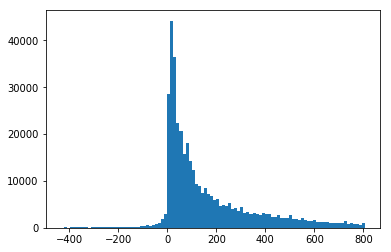

In [27]:
nbins = 100
xmin = Q1 - 1.5 * IQR
xmax = Q3 + 1.5 * IQR

fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_clean.amount, bins=nbins,range=[xmin,xmax])  
plt.show()

## b. The top-5 users based on their monthly spending

To find out top-5 users based on monthly spending, firstly customer's transaction amount should be summed month by month. Then monthly average should be calculated. 

In [28]:
df_amount = df_analysis.groupby(['year_month','cardholder_lname', 'cardholder_finit'])['amount'].agg('sum')
amount_mean = pd.DataFrame(df_amount).reset_index()
amount_mean.columns = ['year_month','cardholder_lname', 'cardholder_finit', 'amount']
df_amount_mean = df_analysis.groupby(['cardholder_lname', 'cardholder_finit'])['amount'].agg('mean')

df_amount_mean.nlargest(5)

cardholder_lname  cardholder_finit
Jordan            J                   800.40
Howk              B                   750.36
Shell             C                   750.00
Russell           S                   725.39
Kropp             B                   684.08
Name: amount, dtype: float64

It can be seen that Jordan J has 800.40 transaction amount whihc is the highest monthly average transaction.

## c. The top-5 most popular vendors by the number of transactions per quarter
(Assume the Quarter starts in July)

To find out most popular vendors, firstly quarter information should be created. Then number of trensaction per vendor should be calculted quarterly. After that average transaction count should be calculated for each vendor.

Following code helps to assing quarter information

In [29]:
def func(row):
    if row['year_month'] in range(201307, 201311):
        return 'Q1'
    elif row['year_month'] in range(201311, 201403):
        return 'Q2' 
    elif row['year_month'] in range(201403, 201407):
        return 'Q3' 
    else:
        return 'other'

df_analysis['quarter'] = df_analysis.apply(func, axis=1)

C:\Users\U083682\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Code is checked in the following.

In [30]:
df_grouped_check = df_analysis.groupby(['year_month','quarter'])['amount'].count()
df_grouped_check

year_month  quarter
201307      Q1         33516
201308      Q1         35084
201309      Q1         34664
201310      Q1         36241
201311      Q2         30766
201312      Q2         23954
201401      Q2         33479
201402      Q2         32245
201403      Q3         33973
201404      Q3         34877
201405      Q3         32637
201406      Q3         33462
Name: amount, dtype: int64

In [31]:
df_quarter = df_analysis.groupby(['quarter','new_vendor' ])['amount'].agg('count')
df_quarter_mean = pd.DataFrame(df_quarter).reset_index()
df_quarter_mean.columns = ['quarter','new_vendor', 'count']
df_quarter_mean2 = df_quarter_mean.groupby(['new_vendor'])['count'].agg('mean')

df_quarter_mean2.nlargest(5)

new_vendor
amazon          7701.666667
staples         7273.333333
wal-mart        3924.666667
american ai     3522.000000
grainger        3515.666667
Name: count, dtype: float64

It can be seen that most popular vendor is amazon which has average 7K transaction quarterly

## d. The top-5 highest categories by the sum of amounts



In [32]:
df_analysis.groupby(['MCC'])['amount'].sum().nlargest(5)

MCC
AMERICAN AIRLINES                                          4568956.37
DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP AND SUP.    3852242.35
INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED               3518863.62
STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER    2818887.57
BOOK STORES                                                2014757.24
Name: amount, dtype: float64

American airlines has the highest transaction amount in total. Hospital equipment, industrial supplies, office supplies and book stores follow it respectively. 

### Export

df_analysis cleaned from outliers and it has newly added 'quarter ' information.

In [ ]:
df_analysis.to_csv('df_analysis.csv', index=False, encoding = 'utf-8')

In [33]:
df_analysis = pd.read_csv('df_analysis.csv')
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394898 entries, 0 to 394897
Data columns (total 13 columns):
year_month          394898 non-null int64
agency_number       394898 non-null int64
agency_name         394898 non-null object
cardholder_lname    394898 non-null object
cardholder_finit    394898 non-null object
description         394898 non-null object
amount              394898 non-null float64
vendor              394887 non-null object
transaction_date    394898 non-null object
posted_date         394898 non-null object
MCC                 394898 non-null object
new_vendor          394887 non-null object
quarter             394898 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 39.2+ MB


<a id='segment'></a>
# Customer Segmentation

The credit card company needs your help to identify them certain customer segments


a. Based on their activity (Customer activity is defined as the number of
transactions performed by the user)

b. Based on their spend

c. Based on the number of unique merchants

From a business perspective, suggest a strategy to target these segments

Before starting this analysis, customer based table should be created and required features should be developed. 

Customers' total transaction amount information is created.

In [34]:
df_sumamount = df_analysis.groupby(['cardholder_lname', 'cardholder_finit'])['amount'].agg('sum')

In [35]:
df_uniq_cust = pd.DataFrame(df_sumamount).reset_index()
df_uniq_cust.columns = ['cardholder_lname', 'cardholder_finit', 'sum_amounts']

In [36]:
df_uniq_cust.head()

,cardholder_lname,cardholder_finit,sum_amounts
0,AARON,B,500.00
1,ACREE,T,12625.00
2,ADAMS,C,1054.71
3,ADAMS,K,8067.13
4,ADAMS,S,2937.56


Customers' transaction count has been calculated.

In [37]:
df_transaction_count = df_analysis.groupby(['cardholder_lname','cardholder_finit'])['amount'].count()
df_transaction_count.head(20)

cardholder_lname       cardholder_finit
AARON                  B                     2
ACREE                  T                    78
ADAMS                  C                    23
                       K                    68
                       S                    31
ADE                    D                    56
ADKINS                 M                     1
ADMIRE                 A                    95
ADUDDELL               D                    10
AGNELLI                M                   141
AKBARAN                B                     1
ALEXANDER              D                    56
ALFORD                 R                    53
ALINGER                D                   491
ALL ABOUT TRAVEL       G                   325
ALL ABOUT TRAVEL LTD.  G                   106
ALLEE-FOREMAN          K                    14
ALLEN                  C                   103
                       S                   431
                       T                    10
Name: amount, dtype:

In [38]:
df_transaction_count = pd.DataFrame(df_transaction_count).reset_index()
df_transaction_count.columns = ['cardholder_lname', 'cardholder_finit', 'transaction_count']

Customers' transaction count is calculated in terms of mcc code.

In [39]:
mcc_unique_count = df_analysis.groupby(['cardholder_lname','cardholder_finit'])['MCC'].nunique()
mcc_unique_count .head(20)

cardholder_lname       cardholder_finit
AARON                  B                    1
ACREE                  T                   13
ADAMS                  C                    6
                       K                   19
                       S                    8
ADE                    D                   12
ADKINS                 M                    1
ADMIRE                 A                    9
ADUDDELL               D                    4
AGNELLI                M                   14
AKBARAN                B                    1
ALEXANDER              D                   18
ALFORD                 R                    9
ALINGER                D                   35
ALL ABOUT TRAVEL       G                   16
ALL ABOUT TRAVEL LTD.  G                    5
ALLEE-FOREMAN          K                    9
ALLEN                  C                   18
                       S                   33
                       T                    5
Name: MCC, dtype: int64

In [40]:
mcc_unique_count = pd.DataFrame(mcc_unique_count).reset_index()
mcc_unique_count.columns = ['cardholder_lname', 'cardholder_finit', 'mcc_unique_count']

Customers' average transaction count is prepared.

In [41]:
amount_mean = df_analysis.groupby(['cardholder_lname','cardholder_finit'])['amount'].mean()
amount_mean.head(20)

cardholder_lname       cardholder_finit
AARON                  B                   250.000000
ACREE                  T                   161.858974
ADAMS                  C                    45.856957
                       K                   118.634265
                       S                    94.760000
ADE                    D                   134.103036
ADKINS                 M                    11.860000
ADMIRE                 A                    81.053368
ADUDDELL               D                   409.000000
AGNELLI                M                   138.391206
AKBARAN                B                   400.000000
ALEXANDER              D                   153.363750
ALFORD                 R                   304.267547
ALINGER                D                    86.554399
ALL ABOUT TRAVEL       G                   233.773169
ALL ABOUT TRAVEL LTD.  G                   203.999057
ALLEE-FOREMAN          K                    38.496429
ALLEN                  C                  

In [42]:
amount_mean = pd.DataFrame(amount_mean).reset_index()
amount_mean.columns = ['cardholder_lname', 'cardholder_finit', 'amount_mean']

Calculated variables gathered into one table.

In [43]:
df_uniq_cust['transaction_count'] = df_transaction_count['transaction_count']
df_uniq_cust['mcc_unique_count'] = mcc_unique_count['mcc_unique_count']
df_uniq_cust['amount_mean'] = amount_mean['amount_mean']
df_uniq_cust.head()

,cardholder_lname,cardholder_finit,sum_amounts,transaction_count,mcc_unique_count,amount_mean
0,AARON,B,500.00,2,1,250.000000
1,ACREE,T,12625.00,78,13,161.858974
2,ADAMS,C,1054.71,23,6,45.856957
3,ADAMS,K,8067.13,68,19,118.634265
4,ADAMS,S,2937.56,31,8,94.760000


df_uniq_cust table is ready for segmentation. Before doing it, it is stored as segmentation table.

In [44]:
segmentation = df_uniq_cust.copy()

In [45]:
segmentation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sum_amounts,5176.0,12363.601041,45306.316336,-224.03,1435.765000,4386.295000,11813.122500,1967873.31
transaction_count,5176.0,76.294049,218.424618,1.00,11.000000,32.000000,83.000000,9118.00
mcc_unique_count,5176.0,12.296754,10.394872,1.00,5.000000,10.000000,17.000000,93.00
amount_mean,5176.0,153.330429,84.390927,-214.17,96.843734,141.938242,196.630931,800.40


It can be seen that standart deviation of transaction_count is so high. Because, K-means algorithm is very sensetive to outlier values, they need to be dropped.

Firstly customers' transaction count variable column cleaned from its outlier.

In [46]:
Q1_trans = segmentation.transaction_count.quantile(0.25)
Q3_trans = segmentation.transaction_count.quantile(0.75)
IQR_trans = Q3_trans - Q1_trans

segmentation = segmentation.loc[(segmentation['transaction_count'] > (Q1_trans - 1.5 * IQR_trans) ) & (segmentation['transaction_count'] < (Q3_trans + 1.5 * IQR_trans))]

Same calculation is done for count of customers' unique mcc. 

In [47]:
Q1_MCC = segmentation.mcc_unique_count.quantile(0.25)
Q3_MCC = segmentation.mcc_unique_count.quantile(0.75)
IQR_MCC = Q3_MCC - Q1_MCC

segmentation = segmentation.loc[(segmentation['mcc_unique_count'] > (Q1_MCC - 1.5 * IQR_MCC) ) & (segmentation['mcc_unique_count'] < (Q3_MCC + 1.5 * IQR_MCC))]

In [48]:
segmentation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sum_amounts,4667.0,6248.269929,7178.696793,-224.03,1240.15000,3621.670,8717.925000,62971.83
transaction_count,4667.0,42.075637,42.067670,1.00,10.00000,27.000,62.000000,190.00
mcc_unique_count,4667.0,10.025284,7.016498,1.00,4.00000,9.000,14.000000,31.00
amount_mean,4667.0,151.662595,86.753046,-214.17,93.50875,138.598,195.904311,800.40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAC61170B8>,
      dtype=object)

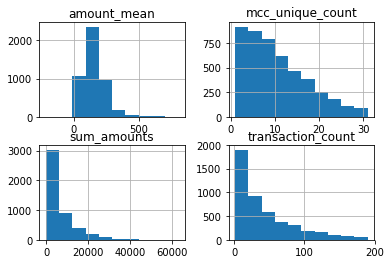

In [49]:
segmentation.hist()

Customers' total trasaction amount still has high standart deviation. However, this variable correlated with others. Therefore, i will drop feature in the following.

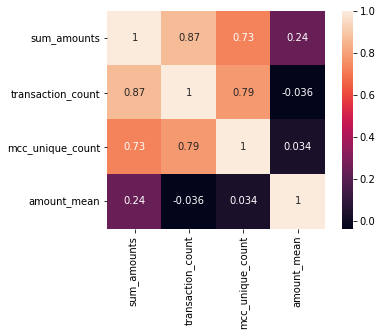

In [50]:
cor = segmentation.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, annot=True, square = True) #Plot the correlation as heat map

In [51]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4667 entries, 0 to 5175
Data columns (total 6 columns):
cardholder_lname     4667 non-null object
cardholder_finit     4667 non-null object
sum_amounts          4667 non-null float64
transaction_count    4667 non-null int64
mcc_unique_count     4667 non-null int64
amount_mean          4667 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 255.2+ KB


sum_amount column dropped from sample.

In [52]:
segmentation = segmentation[['cardholder_lname', 'cardholder_finit','mcc_unique_count', 'amount_mean', 'transaction_count']]
segmentation.iloc[:,0:].head()

,cardholder_lname,cardholder_finit,mcc_unique_count,amount_mean,transaction_count
0,AARON,B,1,250.000000,2
1,ACREE,T,13,161.858974,78
2,ADAMS,C,6,45.856957,23
3,ADAMS,K,19,118.634265,68
4,ADAMS,S,8,94.760000,31


K-means clustering algorithm very sensetive to standartization. Therefore, variables should be transformed before using algorithm.

In [53]:
# Create the scalar.
scaler_mcc = StandardScaler().fit(segmentation.iloc[:,2:3])
scaler_amount_mean = StandardScaler().fit(segmentation.iloc[:,3:4])
scaler_trans = StandardScaler().fit(segmentation.iloc[:,4:5])


# Standardize the columns.
segmentation['std_mcc'] = scaler_mcc.transform(segmentation.iloc[:,2:3])
segmentation['std_amount_mean'] = scaler_amount_mean.transform(segmentation.iloc[:,3:4])
segmentation['std_trans'] = scaler_trans.transform(segmentation.iloc[:,4:5])

In [54]:
segmentation.head()

,cardholder_lname,cardholder_finit,mcc_unique_count,amount_mean,transaction_count,std_mcc,std_amount_mean,std_trans
0,AARON,B,1,250.000000,2,-1.286432,1.133654,-0.952749
1,ACREE,T,13,161.858974,78,0.424006,0.117546,0.854058
2,ADAMS,C,6,45.856957,23,-0.573750,-1.219749,-0.453500
3,ADAMS,K,19,118.634265,68,1.279225,-0.380757,0.616320
4,ADAMS,S,8,94.760000,31,-0.288677,-0.655985,-0.263310


In [55]:
segmentation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mcc_unique_count,4667.0,1.002528e+01,7.016498,1.000000,4.000000,9.000000,14.000000,31.000000
amount_mean,4667.0,1.516626e+02,86.753046,-214.170000,93.508750,138.598000,195.904311,800.400000
transaction_count,4667.0,4.207564e+01,42.067670,1.000000,10.000000,27.000000,62.000000,190.000000
std_mcc,4667.0,1.158752e-16,1.000107,-1.286432,-0.858823,-0.146140,0.566542,2.989663
std_amount_mean,4667.0,7.517259e-17,1.000107,-4.217394,-0.670410,-0.150611,0.510028,7.478780
std_trans,4667.0,-2.731786e-16,1.000107,-0.976523,-0.762559,-0.358405,0.473677,3.516720


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAC5D46518>,
      dtype=object)

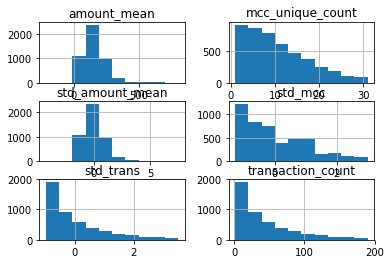

In [56]:
segmentation.hist()

It can been seen from figure standartized variables have 1 standart deviation. They are suitable usage in k-means algortihm.

To find out how many clusters should be selected. SSE value is calculated (elbow figured is drawn)

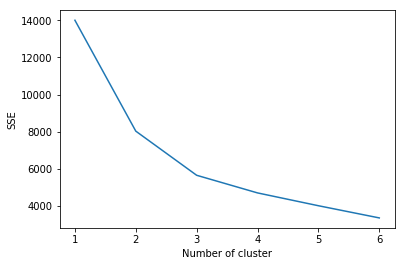

In [57]:
sse = {}
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, max_iter=10000).fit(segmentation.iloc[:,5:])
    segmentation["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ #Inertia: Sum of distances of samples to their closest cluster center
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [58]:
for k in range (1, 7):
    print(k, sse[k])

1 14000.999999999996
2 8028.777996577508
3 5651.649775791419
4 4702.112084962607
5 4011.8486811324065
6 3355.5434897077043


It makes sense to assing 3 cluster; because, SSE doesnot changes drastically after 3 cluster.

Text(0.5,0.92,'K Means\nk=3')

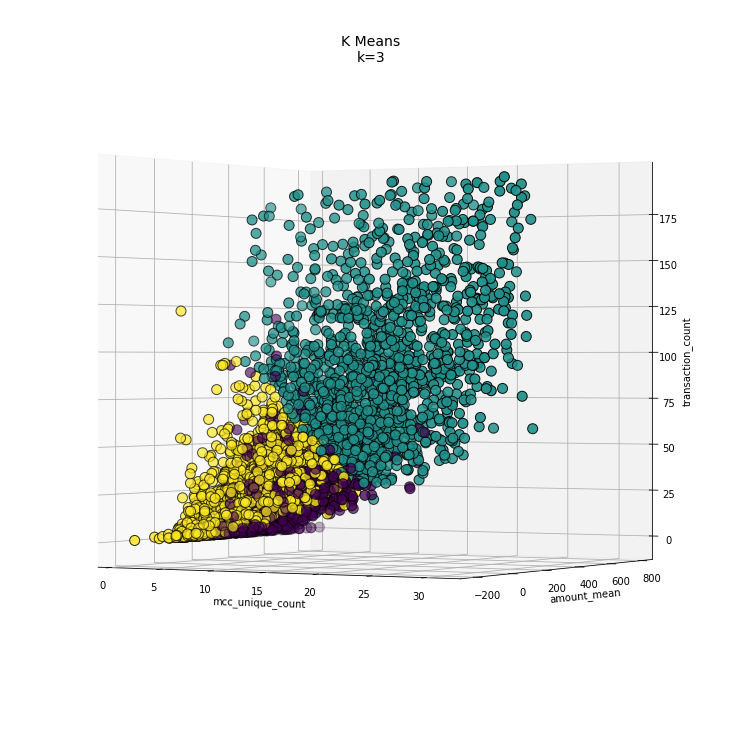

In [63]:
#KMeans
km = KMeans(n_clusters=3, max_iter=10000, random_state=0).fit(segmentation.iloc[:,5:])
km.predict(segmentation.iloc[:,5:])
labels = km.labels_
segmentation["clusters"] = km.labels_

#Plotting
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, elev=0)
ax.scatter(segmentation['mcc_unique_count'], segmentation['amount_mean'], segmentation['transaction_count'],
          c=labels.astype(np.float), edgecolor="k", s=100)
ax.set_xlabel("mcc_unique_count")
ax.set_ylabel("amount_mean")
ax.set_zlabel("transaction_count")
plt.title("K Means\nk=3", fontsize=14)

In [64]:
pvt = pivot_table(segmentation, values = ['amount_mean', 'transaction_count', 'mcc_unique_count'], index = ['clusters'],
                                                                  aggfunc = {'amount_mean' : [np.mean, min, max],
                                                                             'transaction_count' : [np.mean, min, max],
                                                                             'mcc_unique_count' : [np.mean, min, max]})

pvt

amount_mean                         mcc_unique_count                 \
                 max        mean         min              max       mean min   
clusters                                                                       
0         800.400000  259.733219  172.366667               19   6.452611   1   
1         364.206596  152.593461   15.460326               31  18.271613   5   
2         184.900000   99.392509 -214.170000               16   6.134473   1   

         transaction_count                 
                       max       mean min  
clusters                                   
0                      118  17.517408   1  
1                      190  91.716814  22  
2                      122  20.111830   1

Segments are mainly means that

0 : high transaction amount, medium difference in mcc, medium tranction volume

1 : medium transaction amount, high difference in mcc, high tranction volume

2 : low transaction amount, low difference in mcc, low tranction volume

### Export

segmentation table is customer based table which is cleaned from outliers. Also, it includes standartized variables and cluster information.

In [65]:
segmentation.to_csv('segmentation.csv', index=False, encoding = 'utf-8')

In [66]:
segmentation = pd.read_csv ('segmentation.csv')
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667 entries, 0 to 4666
Data columns (total 9 columns):
cardholder_lname     4667 non-null object
cardholder_finit     4667 non-null object
mcc_unique_count     4667 non-null int64
amount_mean          4667 non-null float64
transaction_count    4667 non-null int64
std_mcc              4667 non-null float64
std_amount_mean      4667 non-null float64
std_trans            4667 non-null float64
clusters             4667 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 328.2+ KB


<a id='predict'></a>
# Predictive Modeling

Build a supervised model to predict if a cardholder is doing to make a purchase in the
next k days. Provide some analysis of your model’s performance. Run the model for k=1,
k=5, k=10 .

In this section, I would prefer to predict whether customer does a purchase in desired/optional k days. Before coding this function, variable which helps to define target should be extracted from transactional level table. 

df_analysis table is trannsactional level table whhic is cleaned from outliers and it has newly added 'quarter ' information.

In [67]:
df_predict = df_analysis.copy()

In [68]:
df_predict = df_predict.sort_values(by=['cardholder_lname', 'cardholder_finit', 'transaction_date'])
df_predict.head()

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC,new_vendor,quarter
106008,201401,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,235.00,pbd iia intrnlauditors,01/21/2014 12:00:00 AM,01/22/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q2
359374,201405,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,265.00,pbd iia intrnlauditors,05/19/2014 12:00:00 AM,05/20/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q3
212900,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,188.00,j & e supply and fastner,01/24/2014 12:00:00 AM,01/27/2014 12:00:00 AM,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED,j & e supply and fastner,Q2
212332,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,156.13,idn acme inc,01/27/2014 12:00:00 AM,01/29/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,idn acme inc,Q2
212333,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,104.88,scovil & sides hardware c,01/27/2014 12:00:00 AM,01/29/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES,scovil & sides hardware c,Q2


Next transaction date of each transaction and day difference between transactions are calculated. 

In [69]:
df_predict['nexttransdate'] = df_predict.groupby(['cardholder_lname', 'cardholder_finit'])['transaction_date'].shift(-1)
df_predict.head()

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC,new_vendor,quarter,nexttransdate
106008,201401,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,235.00,pbd iia intrnlauditors,01/21/2014 12:00:00 AM,01/22/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q2,05/19/2014 12:00:00 AM
359374,201405,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,265.00,pbd iia intrnlauditors,05/19/2014 12:00:00 AM,05/20/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q3,NaN
212900,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,188.00,j & e supply and fastner,01/24/2014 12:00:00 AM,01/27/2014 12:00:00 AM,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED,j & e supply and fastner,Q2,01/27/2014 12:00:00 AM
212332,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,156.13,idn acme inc,01/27/2014 12:00:00 AM,01/29/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,idn acme inc,Q2,01/27/2014 12:00:00 AM
212333,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,104.88,scovil & sides hardware c,01/27/2014 12:00:00 AM,01/29/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES,scovil & sides hardware c,Q2,02/04/2014 12:00:00 AM


In [70]:
df_predict['nexttransdate'] = pd.to_datetime(df_predict['nexttransdate'])
df_predict['transaction_date'] = pd.to_datetime(df_predict['transaction_date'])
df_predict['date_diff'] = df_predict['nexttransdate'] - df_predict['transaction_date']
df_predict.head()

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC,new_vendor,quarter,nexttransdate,date_diff
106008,201401,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,235.00,pbd iia intrnlauditors,2014-01-21,01/22/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q2,2014-05-19,118 days
359374,201405,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,265.00,pbd iia intrnlauditors,2014-05-19,05/20/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q3,NaT,NaT
212900,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,188.00,j & e supply and fastner,2014-01-24,01/27/2014 12:00:00 AM,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED,j & e supply and fastner,Q2,2014-01-27,3 days
212332,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,156.13,idn acme inc,2014-01-27,01/29/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,idn acme inc,Q2,2014-01-27,0 days
212333,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,104.88,scovil & sides hardware c,2014-01-27,01/29/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES,scovil & sides hardware c,Q2,2014-02-04,8 days


date_diff feature needs to be converted numeric type.

In [71]:
df_predict['date_diff'] = df_predict['date_diff'] / np.timedelta64(1, 'D')
df_predict.head()

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC,new_vendor,quarter,nexttransdate,date_diff
106008,201401,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,235.00,pbd iia intrnlauditors,2014-01-21,01/22/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q2,2014-05-19,118.0
359374,201405,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,265.00,pbd iia intrnlauditors,2014-05-19,05/20/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q3,NaT,NaN
212900,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,188.00,j & e supply and fastner,2014-01-24,01/27/2014 12:00:00 AM,CONSTRUCTION MATERIALS NOT ELSEWHERE CLASSIFIED,j & e supply and fastner,Q2,2014-01-27,3.0
212332,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,156.13,idn acme inc,2014-01-27,01/29/2014 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,idn acme inc,Q2,2014-01-27,0.0
212333,201401,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,104.88,scovil & sides hardware c,2014-01-27,01/29/2014 12:00:00 AM,HARDWARE EQUIPMENT AND SUPPLIES,scovil & sides hardware c,Q2,2014-02-04,8.0


If the date_diff value is null then 9999 assigns. Because, there is no transaction after spesified transaction. 

In [72]:
df_predict.loc[df_predict['date_diff'].isnull() == True, 'date_diff'] = 9999

Checked

In [73]:
df_predict[df_predict['date_diff'] == 9999].head()

,year_month,agency_number,agency_name,cardholder_lname,cardholder_finit,description,amount,vendor,transaction_date,posted_date,MCC,new_vendor,quarter,nexttransdate,date_diff
359374,201405,39000,COMPSOURCE OKLAHOMA,AARON,B,GENERAL PURCHASE,265.00,pbd iia intrnlauditors,2014-05-19,05/20/2014 12:00:00 AM,"BOOKS, PERIODICALS AND NEWSPAPERS",pbd iia intrnlauditors,Q3,NaT,9999.0
209549,201312,77000,UNIV. OF OKLA. HEALTH SCIENCES CENTER,ACREE,T,GENERAL PURCHASE,11.20,idn acme inc,2013-12-16,12/18/2013 12:00:00 AM,ELECTRICAL PARTS AND EQUIPMENT,idn acme inc,Q2,NaT,9999.0
168827,201311,76000,UNIVERSITY OF OKLAHOMA,ADAMS,C,GENERAL PURCHASE,440.00,shoptrn twoscompany,2013-11-19,11/21/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,shoptrn twoscompany,Q2,NaT,9999.0
177396,201312,76000,UNIVERSITY OF OKLAHOMA,ADAMS,K,GENERAL PURCHASE,9.00,walmart.com,2013-12-19,12/20/2013 12:00:00 AM,DISCOUNT STORES,wallmart,Q2,NaT,9999.0
108991,201311,42000,LANGSTON UNIVERSITY,ADAMS,S,GENERAL PURCHASE,122.37,mcdonald's f,2013-11-09,11/11/2013 12:00:00 AM,FAST FOOD RESTAURANTS,mcdonald's f,Q2,NaT,9999.0


### Export

In [74]:
df_predict.to_csv('df_predict.csv', index=False, encoding = 'utf-8')

In [75]:
df_predict = pd.read_csv("df_predict.csv")

Following code does following calculations:

* Takes input from user
* Turns it into integer
* Creates target column and assign 0 firstly in the transaction table
* Creates target for defined k day
* Creates customer level table from transaction table while taking maximum value of target
* Joined with segmentation table; beacuse, it is cleaned from outliers and it have created variables that can be found from previous studies.
* Feature and target tables created (X, y)
* Splitted into train- test datasets (70,30)
* Decision tree algorithm trained; beacuse, there is no need to correlation elimination or standatization. (maximum depth 3 and minimum sample leaf is decided as 60)
* Predicts test dataset to measure performance
* Model performance measures are calculated. (Accuracy, sensitivity, Specificity)
* Decision tree graph is shown

In [76]:
def auto_modeler():
    print(' This function returns the decision tree and its performance.' ,'\n',
          'Decision tree predicts whether customer does purchase in the desired/optional k day')
    k = input("Please enter desired transaction day(k): ")
    k = pd.to_numeric(k)
    df_predict['target'] = 0
    df_predict.loc[df_predict['date_diff'] <= k, 'target'] = 1
    df_target_uniq = df_predict.groupby(['cardholder_lname','cardholder_finit'])['target'].max()
    df_targetk = pd.DataFrame(df_target_uniq).reset_index()
    df_targetk.columns = ['cardholder_lname', 'cardholder_finit', 'target']
    df_merge = pd.merge(left=segmentation, right= df_targetk, left_on=['cardholder_lname', 'cardholder_finit'],
                       right_on=['cardholder_lname', 'cardholder_finit'], how='left')

    #split dataset in features and target variable
    feature_cols = ['mcc_unique_count', 'amount_mean', 'transaction_count', 'std_mcc','std_amount_mean',
                    'std_trans','clusters']
    X = df_merge[feature_cols] # Features
    y = df_merge['target'] # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=60)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_cols,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dec_treek.png')
    Image(graph.create_png())

    #Confusion Matrix
    cm1 = confusion_matrix(y_test,y_pred)
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print( ' Accuracy : ', accuracy1 ,'\n','Sensitivity : ',sensitivity1,'\n','Specificity : ',specificity1 ,'\n')
    return Image(graph.create_png()) 




## Decision tree predicts whether customer does purchase in the desired/optional 1 day

 This function returns the decision tree and its performance. 
 Decision tree predicts whether customer does purchase in the desired/optional k day
Please enter desired transaction day(k): 1
 Accuracy :  0.9550321199143469 
 Sensitivity :  0.6612903225806451 
 Specificity :  0.9835552075176194 



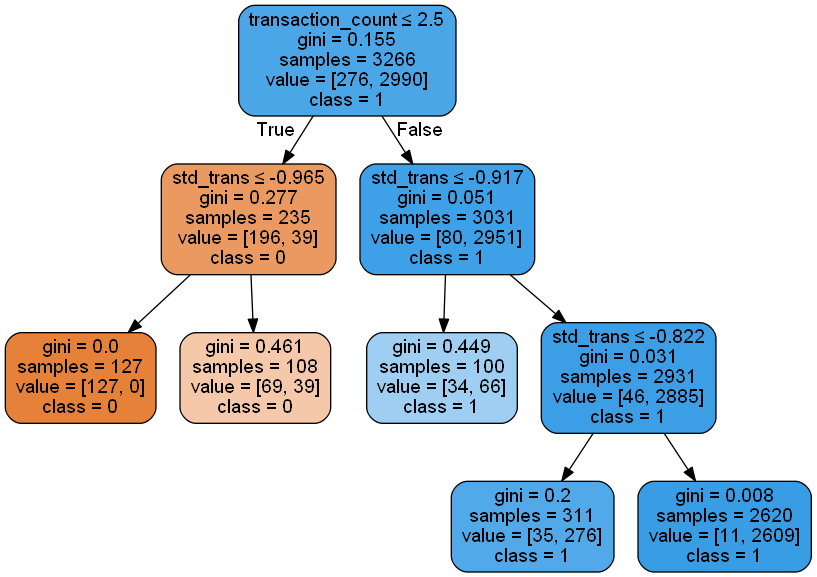

In [77]:
auto_modeler()

## Decision tree predicts whether customer does purchase in the desired/optional 5 days

 This function returns the decision tree and its performance. 
 Decision tree predicts whether customer does purchase in the desired/optional k day
Please enter desired transaction day(k): 5
 Accuracy :  0.9657387580299786 
 Sensitivity :  0.7722772277227723 
 Specificity :  0.9807692307692307 



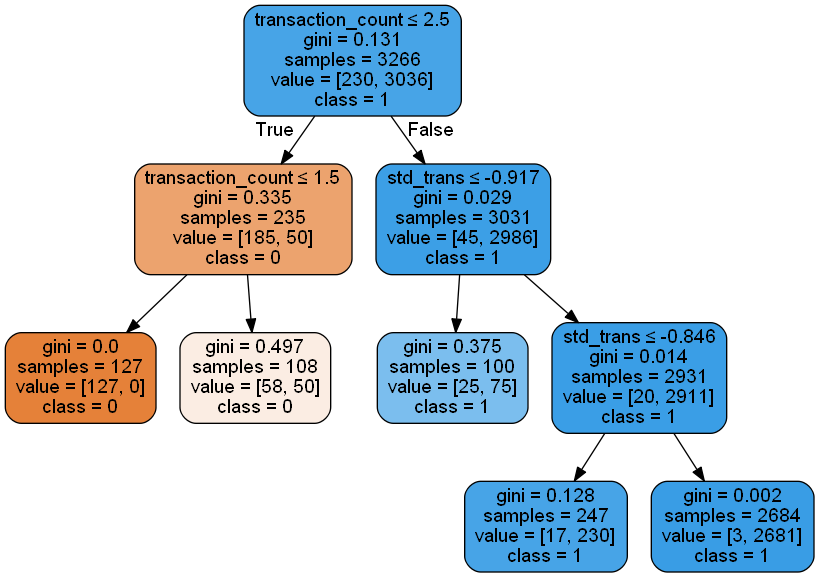

In [78]:
auto_modeler()

## Decision tree predicts whether customer does purchase in the desired/optional 10 days

 This function returns the decision tree and its performance. 
 Decision tree predicts whether customer does purchase in the desired/optional k day
Please enter desired transaction day(k): 10
 Accuracy :  0.9828693790149893 
 Sensitivity :  0.7176470588235294 
 Specificity :  1.0 



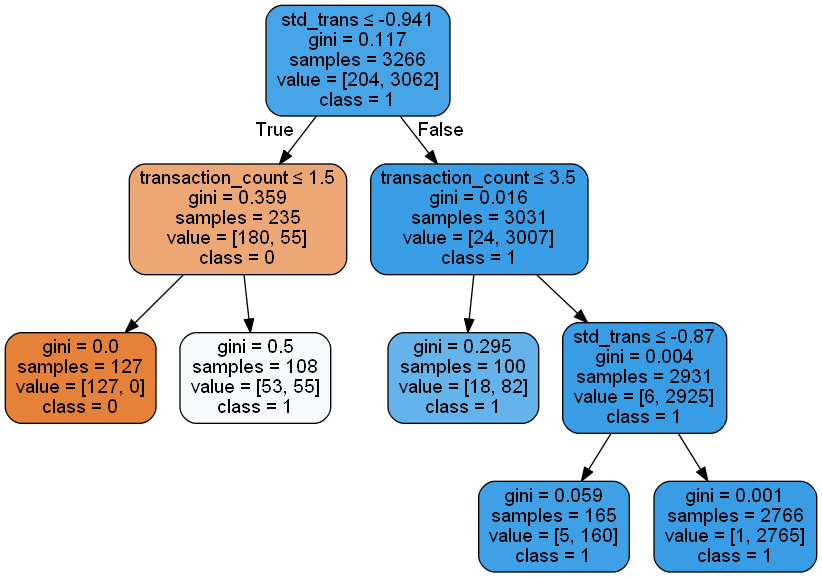

In [80]:
auto_modeler()